In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import nltk
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report



In [2]:
df=pd.read_csv('fake_or_real_news.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [4]:
#now to know how many categories are present, we do the following 
df.groupby("label").count()

,title,text
label,,
FAKE,3164,3164
REAL,3171,3171


In [5]:
#now creating a new dimension in order to store the length of the text data
df['Length']=df['text'].apply(len)
df.head()

,title,text,label,Length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [6]:
df.describe()

,Length
count,6335.000000
mean,4707.250355
std,5090.956446
min,1.000000
25%,1741.500000
50%,3642.000000
75%,6192.000000
max,115372.000000


In [7]:
#from the above given data we found out that average length of the data is 2262 and the minimum length is 501, which needs to be replaced in this case however, it can be left as it is


In [8]:
from nltk.corpus import stopwords
import string
import re

In [9]:
#either this way

In [10]:
a='Hi! I am a good boy. 2+2=4 and 5*5=25'
clean=''.join([char for char in re.sub("[^A_Za-z0-9]"," ",a)])
clean

' i    am a good boy  2 2 4 and 5 5 25'

In [11]:
#or this way the data can be cleaned
clean=''.join([char for char in a if char not in string.punctuation])
clean

'Hi I am a good boy 224 and 5525'

In [12]:
words=stopwords.words('english')

In [13]:
#Function to clean text
def text_clean(mes):
    nopunc=''.join([char for char in mes if char not in string.punctuation])
#     print(nopunc)
    return [word for word in nopunc.split() if word.lower() not in words]

In [14]:
text_clean(a)

['Hi', 'good', 'boy', '224', '5525']

In [15]:
#to vectotrize the words after cleaning
transformer=CountVectorizer(analyzer=text_clean).fit(df['text'])
transformer

CountVectorizer(analyzer=<function text_clean at 0x0000025F6F8F1510>)

In [16]:
transformer.vocabulary_

{'Daniel': 15356,
 'Greenfield': 21998,
 'Shillman': 43142,
 'Journalism': 26613,
 'Fellow': 19560,
 'Freedom': 20373,
 'Center': 12194,
 'New': 33921,
 'York': 51173,
 'writer': 115787,
 'focusing': 73418,
 'radical': 97654,
 'Islam': 25642,
 'final': 72710,
 'stretch': 106655,
 'election': 69255,
 'Hillary': 23599,
 'Rodham': 40451,
 'Clinton': 13030,
 'gone': 75396,
 'war': 114097,
 'FBI': 18879,
 'word': 115470,
 '“unprecedented”': 127427,
 'thrown': 109594,
 'around': 54946,
 'often': 90503,
 'ought': 91325,
 'retired': 100153,
 'it’s': 81827,
 'still': 106313,
 'unprecedented': 112441,
 'nominee': 89234,
 'major': 85088,
 'political': 94541,
 'party': 92480,
 'go': 75286,
 'that’s': 108925,
 'exactly': 70927,
 'people': 92965,
 'done': 68006,
 'Coma': 13449,
 'patients': 92656,
 'waking': 114010,
 'watching': 114285,
 'hour': 78268,
 'CNN': 11244,
 'hospital': 78196,
 'beds': 56615,
 'would': 115683,
 'assume': 55281,
 'Director': 16391,
 'James': 26090,
 'Comey': 13480,
 'Hillar

In [17]:
message_bow=transformer.transform(df['text'])

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(message_bow)
tfidf4=tfidf.transform(message_bow)
print(tfidf4)

  (0, 127499)	0.040955391691163044
  (0, 127427)	0.041486034515614584
  (0, 125857)	0.04818919603269494
  (0, 120686)	0.045345156158319355
  (0, 116004)	0.02194012513647675
  (0, 115811)	0.03734419517403088
  (0, 115787)	0.025362941542310277
  (0, 115742)	0.036611831104580626
  (0, 115701)	0.029978702405947504
  (0, 115690)	0.022719329543445445
  (0, 115683)	0.008598627058587282
  (0, 115470)	0.020663185363750794
  (0, 115395)	0.0167842621507141
  (0, 115311)	0.028526058129858572
  (0, 115246)	0.040955391691163044
  (0, 115163)	0.0258111460836847
  (0, 114991)	0.035136649656158495
  (0, 114960)	0.018101243677222614
  (0, 114830)	0.014037259495252426
  (0, 114793)	0.02343278598046527
  (0, 114779)	0.0215501519477609
  (0, 114586)	0.012235076969361701
  (0, 114458)	0.04207263294328645
  (0, 114356)	0.034189238953191446
  (0, 114285)	0.023454576754490145
  :	:
  (6334, 22785)	0.11014766557827754
  (6334, 21923)	0.04624929484464912
  (6334, 21835)	0.05137473046183579
  (6334, 20758)	0.1018

In [19]:

x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2,shuffle=True)


In [20]:
#creating the pipeline
from sklearn.svm import SVC
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_clean)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC()),
])

In [25]:
x_test.iloc[1:2].values[0]

'On this day in 1973, J. Fred Buzhardt, a lawyer defending President Richard Nixon in the Watergate case, revealed that a key White House tape had an 18...'

In [26]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_clean at 0x0000025F6F8F1510>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [27]:
predictions = pipeline.predict(x_test)
predictions

array(['FAKE', 'REAL', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [28]:
print("Test accuracy ",accuracy_score(y_test,pipeline.predict(x_test)))
print("Train accuracy ",accuracy_score(y_train,pipeline.predict(x_train)))

Test accuracy  0.9423835832675612
Train accuracy  0.9988161010260458


In [30]:
# news = input("Enter news = ")
news_data = {'predict_news':[x_test.iloc[1:2].values[0]]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = pipeline.predict(news_data_df['predict_news'])
print("Predicted news = ",predict_news_cat[0])

Predicted news =  REAL


In [31]:
#for confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)

[[601  24]
 [ 49 593]]


In [32]:
print(classification_report(pipeline.predict(x_test),y_test))

              precision    recall  f1-score   support

        FAKE       0.96      0.92      0.94       650
        REAL       0.92      0.96      0.94       617

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



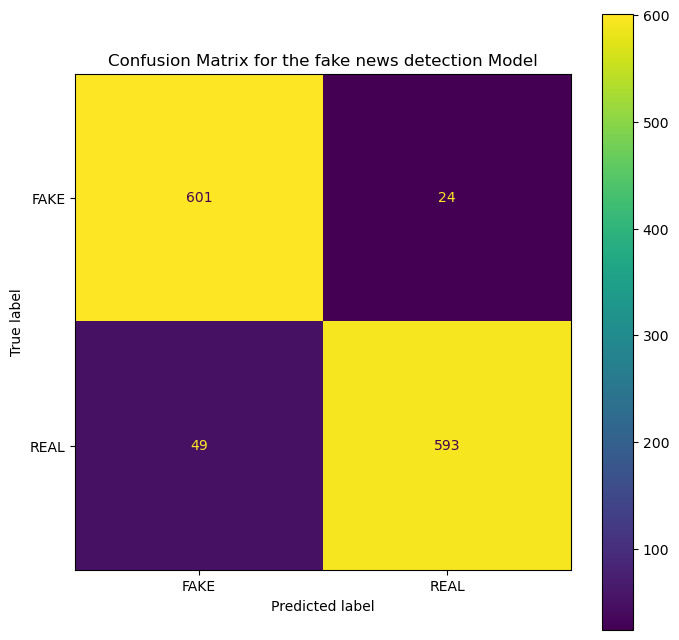

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class_names =['FAKE','REAL']
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the fake news detection Model')

# show the plot.
# Pass the parameter ax to show customizations
display.plot(ax=ax);